In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
!pip install ultralytics

In [10]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 919, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are frozenset({'track', 'train', 'export', 'val', 'benchmark', 'predict'}).

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of frozenset({'segment', 'detect', 'obb', 'pose', 'classify'})
                MODE (required) is one of frozenset({'track', 'train', 'export', 'val', 'benchmark', 'predict'})
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
     

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xPkvXFR7ZGE5jC0Rnbrg")
project = rf.workspace("catargiuconstantin").project("firesmokedataset")
version = project.version(3)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to FireSmokeDataset-3 in yolov8:: 100%|██████████| 93138/93138 [00:12<00:00, 7595.38it/s] 


In [4]:
!yolo task=detect mode=predict model=yolov8m.pt conf=0.25 source="/kaggle/working/FireSmokeDataset-3/test/images/0120_jpg.rf.ce7f743a54e5498046c73abc6708e7b8.jpg"

100%|███████████████████████████████████████| 49.7M/49.7M [00:00<00:00, 272MB/s]
Ultralytics 8.3.81 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m summary (fused): 92 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs

image 1/1 /kaggle/working/FireSmokeDataset-3/test/images/0120_jpg.rf.ce7f743a54e5498046c73abc6708e7b8.jpg: 640x640 (no detections), 37.2ms
Speed: 7.4ms preprocess, 37.2ms inference, 99.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


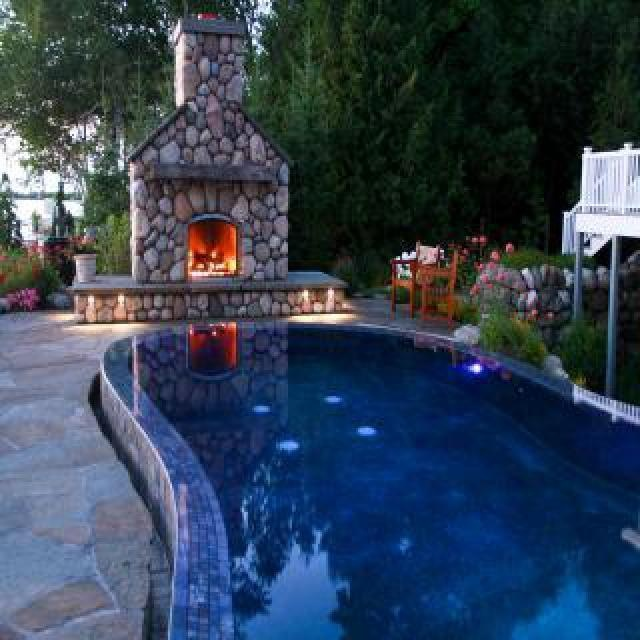

In [5]:
Image(filename="/kaggle/working/runs/detect/predict/0120_jpg.rf.ce7f743a54e5498046c73abc6708e7b8.jpg", height=500)

In [11]:
import os
import random

# Path to dataset images (Change this based on your dataset location)
image_dir = "/kaggle/working/FireSmokeDataset-3/test/images"

# Get all image file names
image_files = [f for f in os.listdir(image_dir) if f.endswith((".jpg", ".png"))]

# Ensure there are at least 9 images before sampling
num_samples = min(9, len(image_files))
random_images = random.sample(image_files, num_samples)

print(f"Selected {num_samples} images: {random_images}")


Selected 9 images: ['FireSmokeVideo333_f16_jpg.rf.d88a2b0998c58cdea221f16f7a05add8.jpg', 'FireSmokeVideo187_f108_jpg.rf.8ff1c4f9c408101fd77d97163aae336f.jpg', 'FireVideo52_f74_jpg.rf.1d9f0fe31547e91681f07e9ee6b10ee3.jpg', 'NEWFireVideo94_f42_jpg.rf.5b3de9cbd02493b3b289b627a46925fa.jpg', 'FireSmokeVideo320_f30_jpg.rf.366e3eba5d9d89b91386cfa6b6118f5c.jpg', 'FireSmokeVideo227_f171_jpg.rf.e020afa238a5b828d6a5f526e866b5a1.jpg', 'NEWFireVideo143_f212_jpg.rf.c06cf0e32b9b947951dc390bdc6e1182.jpg', 'FireVideo61_f64_jpg.rf.e41b6a3d6a8ef96c5ccd68271a793648.jpg', 'FireSmokeVideo320_f101_jpg.rf.419253e0c9871cce19a5387ceb4ae61e.jpg']


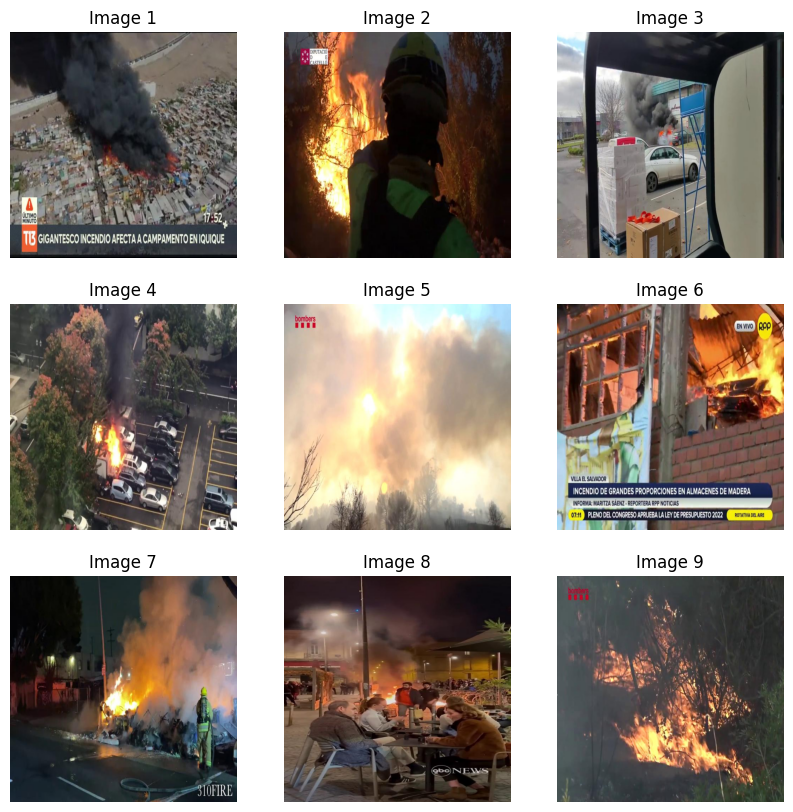

In [12]:
# Create a 3x3 plot
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Loop through images and display them
for i in range(len(random_images)):
    img_path = os.path.join(image_dir, random_images[i])  # Get image path
    img = cv2.imread(img_path)  # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

    row = i // 3  # Get row index
    col = i % 3   # Get column index
    axes[row, col].imshow(img)  # Show image in the correct subplot
    axes[row, col].axis("off")  # Hide axis labels
    axes[row, col].set_title(f'Image {i+1}')


plt.show()  # Display all images

In [6]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=30 batch=16 imgsz=640 lr0=0.01 optimizer="SGD" device="cuda" augment=True

Ultralytics 8.3.81 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/FireSmokeDataset-3/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

In [7]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.81 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /kaggle/working/FireSmokeDataset-3/valid/labels.cache... 6068 imag
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       6068      12990      0.789      0.736      0.787        0.5
                  fire       4226       5986       0.84      0.845      0.891      0.586
                 other       1038       2135       0.68      0.563        0.6      0.328
                 smoke       4043       4869      0.849      0.801      0.868      0.587
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
Speed: 0.2ms preprocess, 22.4ms inference, 0.0ms l

In [8]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source="/kaggle/working/FireSmokeDataset-3/test/images/0120_jpg.rf.ce7f743a54e5498046c73abc6708e7b8.jpg"

Ultralytics 8.3.81 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /kaggle/working/FireSmokeDataset-3/test/images/0120_jpg.rf.ce7f743a54e5498046c73abc6708e7b8.jpg: 640x640 1 fire, 36.9ms
Speed: 3.0ms preprocess, 36.9ms inference, 165.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


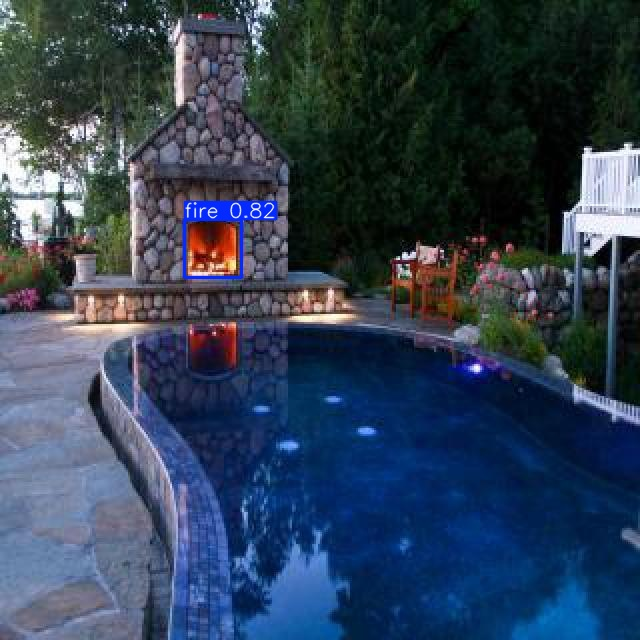

In [9]:
Image(filename="/kaggle/working/runs/detect/predict2/0120_jpg.rf.ce7f743a54e5498046c73abc6708e7b8.jpg", height=500)

In [15]:
# Check if model file exists
model_path = "/kaggle/input/best-7"
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found at: {model_path}")

# Load models
pretrained_model = YOLO("yolov8m.pt")  # Pre-trained YOLOv8m model
trained_model = YOLO(model_path, task="detect")  # Your trained model

# Get class names
pretrained_classes = pretrained_model.model.names  # Pretrained model classes
trained_classes = trained_model.model.names  # Your dataset classes

print("Pretrained Model Classes:", pretrained_classes)
print("Trained Model Classes:", trained_classes)

AttributeError: 'str' object has no attribute 'names'

Selected 9 images: ['NEWFireVideo111_f128_jpg.rf.104ebcdb5b34458e6f70aa032e0771ef.jpg', 'FireSmokeVideo316_f43_jpg.rf.39dee6cbf692c73fe1eeb38c595459bc.jpg', 'FireSmokeVideo194_f126_jpg.rf.44a489ea036be3a93dfdbbb9aec59bdf.jpg', 'FireVideo120_f88_jpg.rf.d4e017cc9104df939472ce6653066cab.jpg', 'FireSmokeVideo296_f98_jpg.rf.c80328b752e6f32e8e427f2f759b6594.jpg', 'NEWFireVideo57_f92_jpg.rf.0631d8af5ad4fa7cd386c0b44caa5582.jpg', 'val_630_jpg.rf.eda8f17d44672293724a8fa1977c9c43.jpg', 'FireSmokeVideo72_f72_jpg.rf.a9fb45bdb7d3a05d240a65da9576e43b.jpg', 'FireSmokeVideo141_f6_jpg.rf.c00c6bb192bd6f83aeffabbdb45e9526.jpg']

image 1/1 /kaggle/working/FireSmokeDataset-3/test/images/NEWFireVideo111_f128_jpg.rf.104ebcdb5b34458e6f70aa032e0771ef.jpg: 640x640 1 train, 37.5ms
Speed: 2.6ms preprocess, 37.5ms inference, 190.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/FireSmokeDataset-3/test/images/NEWFireVideo111_f128_jpg.rf.104ebcdb5b34458e6f70aa032e0771ef.jpg: 640x640 1 sm

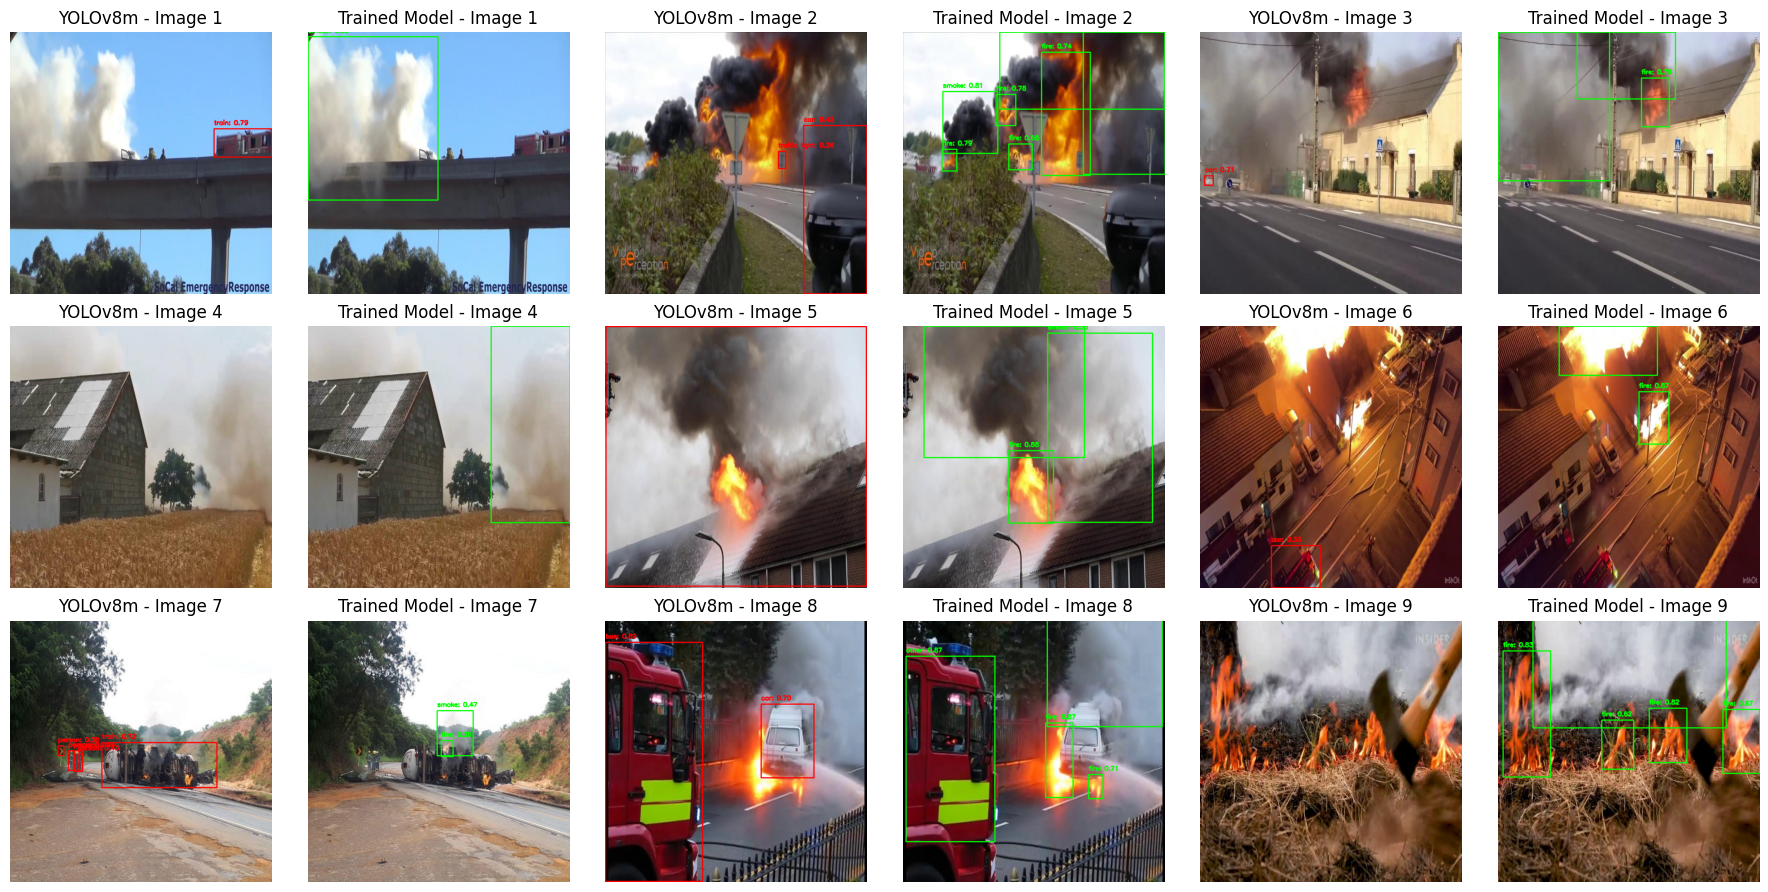

In [37]:
# Load YOLOv8m (pre-trained) and your trained model
pretrained_model = YOLO("yolov8m.pt")  # YOLOv8m (pre-trained model)
trained_model = YOLO("/kaggle/input/best-7-model/pytorch/default/1/best (7).pt")  # Replace with your trained model

# Get class names from models
pretrained_classes = pretrained_model.names  # COCO classes
trained_classes = trained_model.names  # Your dataset classes

# Path to dataset images
image_dir = "/kaggle/working/FireSmokeDataset-3/test/images"

# Get all image file names
image_files = [f for f in os.listdir(image_dir) if f.endswith((".jpg", ".png"))]

# Ensure there are at least 9 images before sampling
num_samples = min(9, len(image_files))
random_images = random.sample(image_files, num_samples)

print(f"Selected {num_samples} images: {random_images}")

# Create a 3x6 plot (3 rows, 6 columns) to compare results
fig, axes = plt.subplots(3, 6, figsize=(18, 9))

# Loop through images and perform inference using both models
for i, image_name in enumerate(random_images):
    img_path = os.path.join(image_dir, image_name)  # Get image path

    # Read image with OpenCV
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Perform inference with YOLOv8m (pre-trained)
    results_pretrained = pretrained_model(img_path)

    # Perform inference with trained model
    results_trained = trained_model(img_path)

    # Draw results for YOLOv8m
    img_pretrained = img.copy()
    for result in results_pretrained:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            conf = box.conf[0].item()  # Confidence score
            cls = int(box.cls[0].item())  # Class index
            class_name = pretrained_classes.get(cls, "Unknown")  # Get class name
            
            cv2.rectangle(img_pretrained, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(img_pretrained, f'{class_name}: {conf:.2f}', (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Draw results for Trained Model
    img_trained = img.copy()
    for result in results_trained:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            conf = box.conf[0].item()  # Confidence score
            cls = int(box.cls[0].item())  # Class index
            class_name = trained_classes.get(cls, "Unknown")  # Get class name
            
            cv2.rectangle(img_trained, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img_trained, f'{class_name}: {conf:.2f}', (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Plot results side by side
    row, col = i // 3, i % 3  # Row and column index
    axes[row, col * 2].imshow(img_pretrained)  # Display YOLOv8m results
    axes[row, col * 2].axis("off")
    axes[row, col * 2].set_title(f'YOLOv8m - Image {i+1}')

    axes[row, col * 2 + 1].imshow(img_trained)  # Display trained model results
    axes[row, col * 2 + 1].axis("off")
    axes[row, col * 2 + 1].set_title(f'Trained Model - Image {i+1}')

plt.tight_layout()
plt.show()  # Show all images


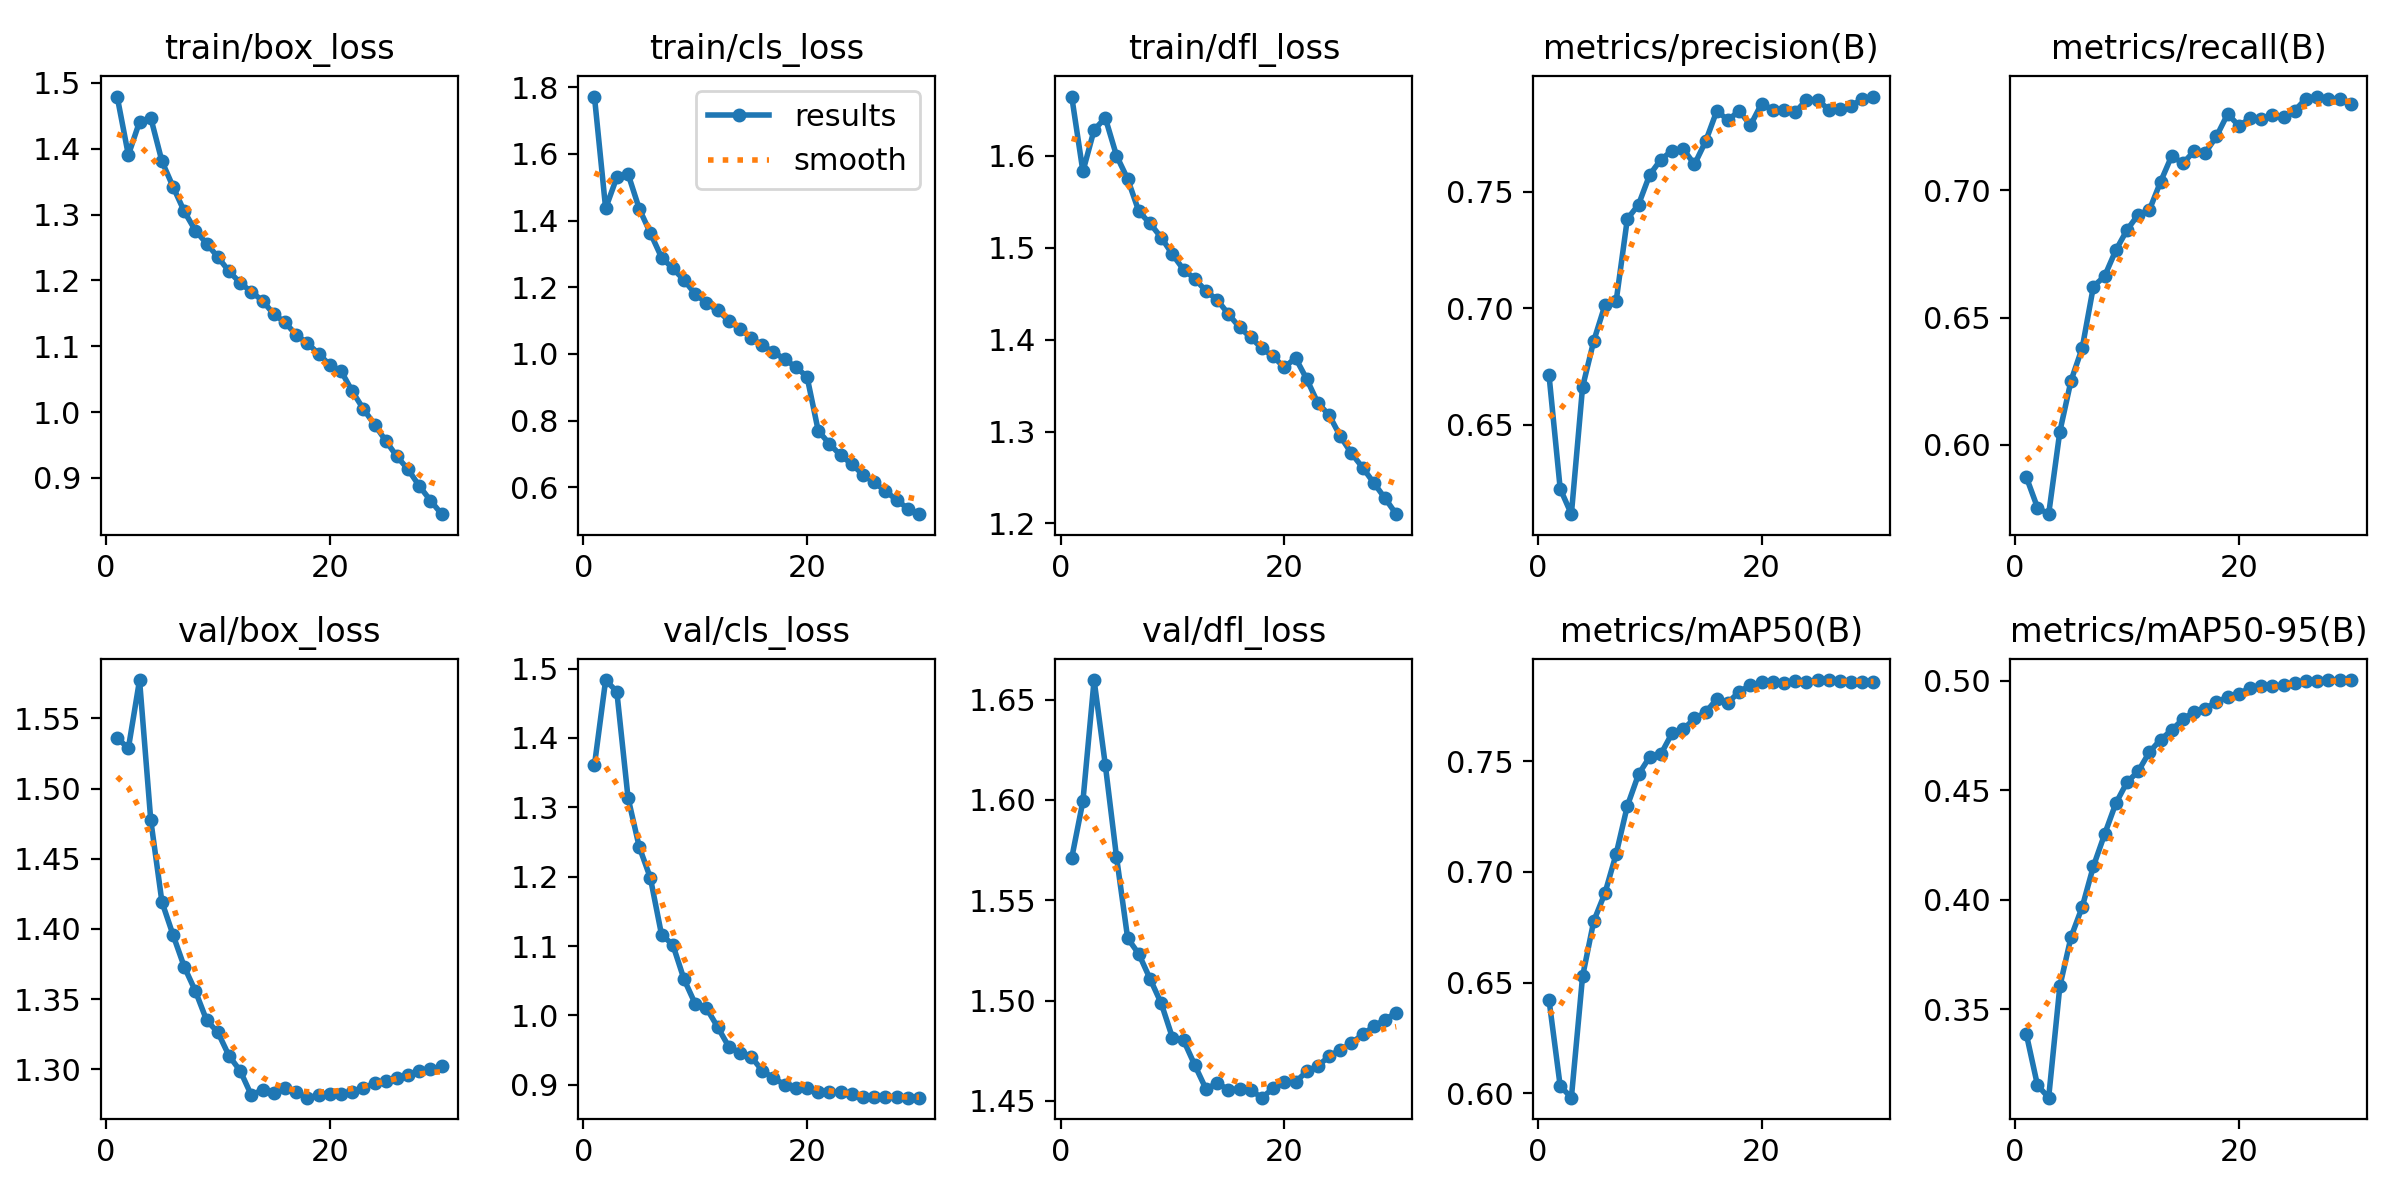

In [15]:
Image(filename="/kaggle/working/runs/detect/train/results.png", height=500)

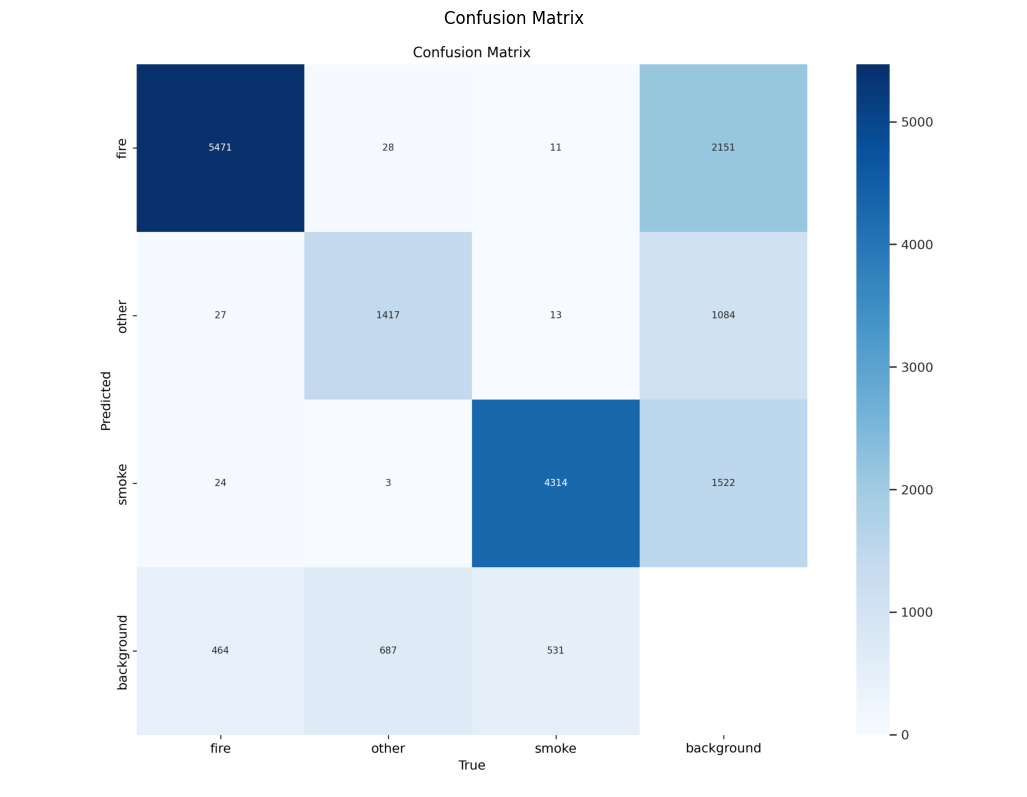

In [17]:
import matplotlib.pyplot as plt
import cv2

# Path to the confusion matrix image
image_path = "/kaggle/working/runs/detect/train/confusion_matrix.png"

# Load and display the image
img = cv2.imread(image_path)  # Read the image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display

plt.figure(figsize=(13, 13))  # Set figure size
plt.imshow(img)  # Show image
plt.axis('off')  # Hide axes
plt.title("Confusion Matrix")
plt.show()


In [35]:
!yolo task=detect mode=predict model="/kaggle/input/best-7-model/pytorch/default/1/best (7).pt" source='/kaggle/input/wildfire-sample/Raging Wildfires Burn Across Canada Sending Smoke Down to the US.mp4' save=True

Ultralytics 8.3.82 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/2714) /kaggle/input/wildfire-sample/Raging Wildfires Burn Across Canada Sending Smoke Down to the US.mp4: 384x640 1 smoke, 59.4ms
video 1/1 (frame 2/2714) /kaggle/input/wildfire-sample/Raging Wildfires Burn Across Canada Sending Smoke Down to the US.mp4: 384x640 1 smoke, 25.1ms
video 1/1 (frame 3/2714) /kaggle/input/wildfire-sample/Raging Wildfires Burn Across Canada Sending Smoke Down to the US.mp4: 384x640 1 smoke, 25.1ms
video 1/1 (frame 4/2714) /kaggle/input/wildfire-sample/Raging Wildfires Burn Across Canada Sending Smoke Down to the US.mp4: 384x640 1 smoke, 25.0ms
video 1/1 (frame 5/2714) /kaggle/input/wildfire-sample/Raging Wildfires Burn Across Canada Sending Smoke Down to the US.mp4: 384x640 1 smoke, 25.1ms
video 1/1 (frame 6/2714) /kaggle/input/wildfire-sample/Raging Wildfires Burn Across Canada